##  Maris Ioannis, 2022, Applied Statistics lab ($\textbf{house prices prediction}$), dataset: $\href{https://polyhedron.math.uoc.gr/2122/moodle/pluginfile.php/15274/mod_assign/intro/saratoga-house-prices.txt}{\textbf{click here}}$

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import tikzplotlib #for latex
from sympy import latex
%matplotlib inline
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv("saratoga_dataset.txt", sep="\t")

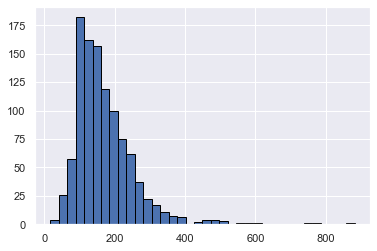

In [3]:
plt.hist(data.Price,edgecolor='black',bins=36)
plt.show()

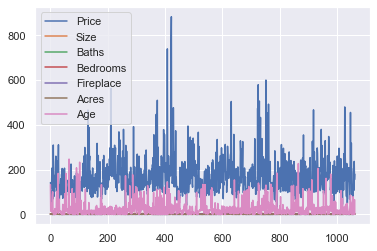

In [4]:
data.plot()
plt.show()

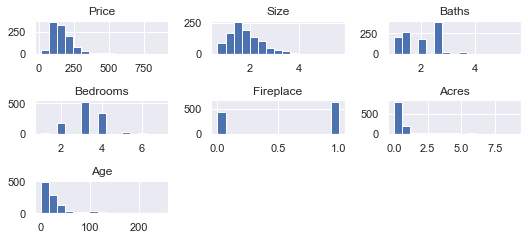

In [74]:
data.hist(bins=15)
plt.show()

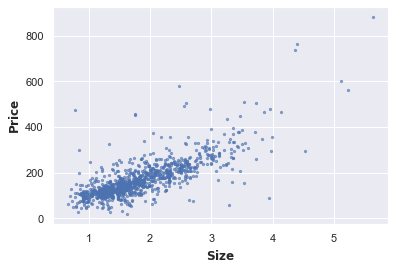

In [6]:
plt.scatter(data.Size,data.Price, marker='.',alpha=0.6,s=20)
plt.xlabel('$\mathbf{Size}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

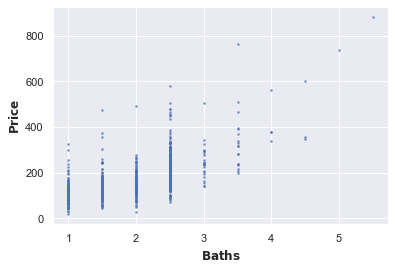

In [7]:
plt.scatter(data.Baths,data.Price, marker='.',alpha=0.6,s=10)
plt.xlabel('$\mathbf{Baths}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

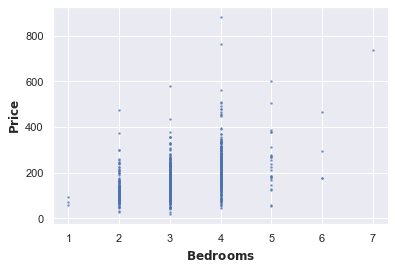

In [8]:
plt.scatter(data.Bedrooms,data.Price , marker='.',alpha=0.6,s=9)
plt.xlabel('$\mathbf{Bedrooms}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

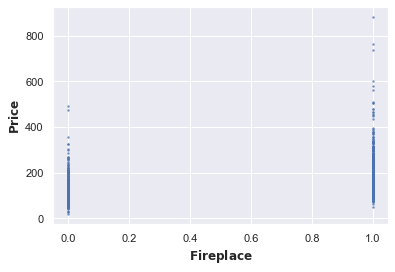

In [9]:
plt.scatter(data.Fireplace,data.Price, marker='.',alpha=0.6,s=9)
plt.xlabel('$\mathbf{Fireplace}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

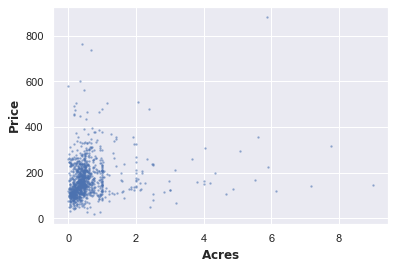

In [10]:
plt.scatter(data.Acres, data.Price, marker='.',alpha=0.4, s=9)
plt.xlabel('$\mathbf{Acres}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

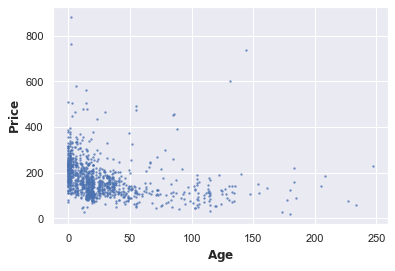

In [11]:
plt.scatter(data.Age, data.Price, marker='.',alpha=0.6,s=9)
plt.xlabel('$\mathbf{Age}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

In [12]:
data.describe().applymap(lambda x: format(float(x),".4f") if x not in [0,1] else int(x)|0)

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
count,1063.0000,1063.0000,1063.0000,1063.0000,1063.0000,1063.0000,1063.0000
mean,170.0689,1.8335,1.9374,3.2004,0.5974,0.5749,28.2493
std,84.4766,0.6896,0.6685,0.7680,0.4907,0.7922,35.1275
min,16.8580,0.6720,1,1,0,0,0
25%,112.5790,1.3435,1.5000,3.0000,0,0.2100,6.0000
50%,152.7860,1.6800,2.0000,3.0000,1,0.3900,18.0000
75%,207.1275,2.2420,2.5000,4.0000,1,0.6100,34.0000
max,882.3410,5.6320,5.5000,7.0000,1,9.0000,247.0000


In [13]:
data.corr(method='pearson').iloc[1:, :1].style.highlight_max(color = 'lightgreen')

,Price
Size,0.771077
Baths,0.669534
Bedrooms,0.470021
Fireplace,0.409479
Acres,0.179581
Age,-0.261410


In [14]:
data.corr(method='pearson').applymap(lambda x: format(x,".3f"))

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
Price,1.000,0.771,0.670,0.470,0.409,0.180,-0.261
Size,0.771,1.000,0.744,0.668,0.474,0.224,-0.231
Baths,0.670,0.744,1.000,0.514,0.446,0.131,-0.401
Bedrooms,0.470,0.668,0.514,1.000,0.304,0.146,-0.039
Fireplace,0.409,0.474,0.446,0.304,1.000,0.058,-0.242
Acres,0.180,0.224,0.131,0.146,0.058,1.000,0.006
Age,-0.261,-0.231,-0.401,-0.039,-0.242,0.006,1.000


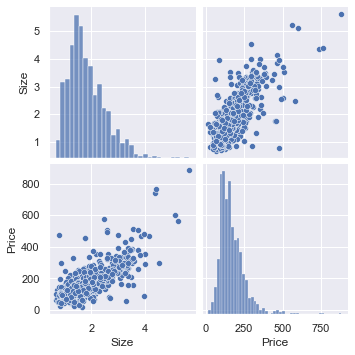

In [15]:
sns.pairplot(data[['Size','Price']])
plt.show()

In [16]:
data.corr(method='pearson') #all corr

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
Price,1.000000,0.771077,0.669534,0.470021,0.409479,0.179581,-0.261410
Size,0.771077,1.000000,0.743759,0.668457,0.473769,0.223709,-0.231339
Baths,0.669534,0.743759,1.000000,0.514167,0.445615,0.130693,-0.400744
Bedrooms,0.470021,0.668457,0.514167,1.000000,0.304276,0.146100,-0.038714
Fireplace,0.409479,0.473769,0.445615,0.304276,1.000000,0.058483,-0.242419
Acres,0.179581,0.223709,0.130693,0.146100,0.058483,1.000000,0.006161
Age,-0.261410,-0.231339,-0.400744,-0.038714,-0.242419,0.006161,1.000000


In [17]:
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data),
                               columns=list(data.columns))

data_normalized.applymap(lambda x: format(float(x),".4f") if x not in [0,1] else int(x)|0)

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
0,-0.3299,0.2155,-1.4030,-0.2610,-1.2180,1.7998,2.9834
1,-0.4169,-0.2285,-0.6547,-0.2610,0.8210,-0.2461,-0.4058
2,-0.6166,-0.2024,0.0936,-0.2610,0.8210,0.4864,-0.3774
3,-0.3763,-0.0486,-1.4030,-1.5638,0.8210,-0.1198,0.5910
4,-0.4808,0.3692,-1.4030,-0.2610,0.8210,1.5977,0.0214
...,...,...,...,...,...,...,...
1058,0.4312,0.6913,0.8419,-0.2610,-1.2180,0.5369,-0.2919
1059,-0.7387,-0.0457,0.0936,1.0417,0.8210,0.4990,0.7904
1060,0.7896,2.0391,2.3385,1.0417,0.8210,2.4313,-0.7761
1061,-0.1805,-0.5709,0.0936,-1.5638,0.8210,0.0444,1.0752


In [18]:
data_normalized.std()

Price        1.000471
Size         1.000471
Baths        1.000471
Bedrooms     1.000471
Fireplace    1.000471
Acres        1.000471
Age          1.000471
dtype: float64

In [19]:
data_normalized.mean() # ~zero

Price        2.172403e-16
Size         1.270020e-16
Baths       -3.342158e-18
Bedrooms    -8.689610e-17
Fireplace   -1.270020e-16
Acres        3.676374e-17
Age          2.506618e-17
dtype: float64

In [20]:
df_x = data_normalized.iloc[:, 1:]
df_x

,Size,Baths,Bedrooms,Fireplace,Acres,Age
0,0.215456,-1.402980,-0.261045,-1.218050,1.799810,2.983414
1,-0.228485,-0.654677,-0.261045,0.820985,-0.246094,-0.405835
2,-0.202371,0.093626,-0.261045,0.820985,0.486390,-0.377354
3,-0.048587,-1.402980,-1.563817,0.820985,-0.119804,0.591003
4,0.369240,-1.402980,-0.261045,0.820985,1.597746,0.021381
...,...,...,...,...,...,...
1058,0.691315,0.841929,-0.261045,-1.218050,0.536906,-0.291911
1059,-0.045685,0.093626,1.041728,0.820985,0.499019,0.790370
1060,2.039097,2.338535,1.041728,0.820985,2.431262,-0.776090
1061,-0.570871,0.093626,-1.563817,0.820985,0.044374,1.075181


In [21]:
df_y = data_normalized[["Price"]]
df_y

,Price
0,-0.329914
1,-0.416926
2,-0.616578
3,-0.376280
4,-0.480820
...,...
1058,0.431223
1059,-0.738705
1060,0.789562
1061,-0.180489


In [22]:
L_Reg = linear_model.LinearRegression()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=0)

In [24]:
L_Reg.fit(x_train, y_train)

LinearRegression()

In [25]:
pd.DataFrame(L_Reg.coef_, columns=list(data.columns)[1:]) #model parameters

,Size,Baths,Bedrooms,Fireplace,Acres,Age
0,0.642502,0.160784,-0.077116,0.021009,-0.006268,-0.050316


In [26]:
L_Reg.intercept_

array([-0.0032122])

In [27]:
y_pred = L_Reg.predict(x_test)
pd.DataFrame(y_pred,columns=["$\hat y_{pred}$"])

,$\hat y_{pred}$
0,-1.187105
1,-0.333891
2,-0.221910
3,-0.369279
4,-0.845030
...,...
314,0.104622
315,-0.964946
316,0.629733
317,-0.359145


In [28]:
print(f'MSE:  {format(mean_squared_error(y_test, y_pred),".2f")}')
print(f'R^2:  {format(r2_score(y_test, y_pred),".2f")}')

MSE:  0.40
R^2:  0.66


In [29]:
pd.DataFrame(y_pred,columns=["$\hat y_{pred}$"],
            index = list(y_test[['Price']].index))

,$\hat y_{pred}$
175,-1.187105
984,-0.333891
685,-0.221910
521,-0.369279
855,-0.845030
...,...
746,0.104622
50,-0.964946
162,0.629733
866,-0.359145


In [30]:
y_test

,Price
175,-0.547568
984,-0.232539
685,-0.702666
521,-0.710044
855,-1.237835
...,...
746,0.135570
50,-0.766323
162,0.131117
866,-0.493089


In [31]:
# Mean square error
#np.mean((y_pred - np.array(y_test))**2)

In [32]:
L_Reg.score(x_test, y_test)

0.6573011166023108

In [33]:
model = sm.OLS(y_train, x_train)
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.594    
Dependent Variable:     Price            AIC:                         1396.1533
Date:                   2022-06-06 00:03 BIC:                         1423.8255
No. Observations:       744              Log-Likelihood:              -692.08  
Df Model:               6                F-statistic:                 182.2    
Df Residuals:           738              Prob (F-statistic):          5.38e-142
R-squared (uncentered): 0.597            Scale:                       0.37933  
-----------------------------------------------------------------------------------
                 Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Size             0.6424       0.0401     16.0398     0.0000      0.5638      0.7210
Baths            0.1609       0.0370      4.3446     0.0000      0.0882      0.2337
Bedrooms        -0.0771       0.0314     -2.4552     0.0143     -0.1388     -0.0155
Fireplace        0.0209       0.0262      0.7987     0.4247     -0.0305      0.0724
Acres           -0.0063       0.0221     -0.2840     0.7765     -0.0498      0.0372
Age             -0.0501       0.0279     -1.7967     0.0728     -0.1048      0.0046
-------------------------------------------------------------------------------
Omnibus:                 444.514           Durbin-Watson:              1.983   
Prob(Omnibus):           0.000             Jarque-Bera (JB):           6778.167
Skew:                    2.387             Prob(JB):                   0.000   
Kurtosis:                16.995            Condition No.:              4       
===============================================================================

"""

In [34]:
pd.DataFrame(fitted_model.summary2().tables[1]['P>|t|']).applymap(lambda x: format(float(x),".4f")) #p-values

,P>|t|
Size,0.0000
Baths,0.0000
Bedrooms,0.0143
Fireplace,0.4247
Acres,0.7765
Age,0.0728


In [35]:
#just unnomilize the data

unscl = lambda Df: pd.DataFrame(scaler.inverse_transform(Df),
                       columns=list(Df.columns))

data_normalized = unscl(data_normalized)
df_x = data_normalized.iloc[:, 1:]
df_y = data_normalized[["Price"]]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=0)
L_Reg.fit(x_train, y_train)
pd.DataFrame(L_Reg.coef_, columns=list(data.columns)[1:])
y_pred = L_Reg.predict(x_test)
pd.DataFrame(y_pred,columns=["$\hat y_{pred}$"],
            index = list(y_test[['Price']].index))

,$\hat y_{pred}$
175,69.833442
984,141.876190
685,151.331525
521,138.888121
855,98.717250
...,...
746,178.902835
50,88.591895
162,223.241613
866,139.743833


In [36]:
pd.DataFrame(L_Reg.coef_, 
             columns=list(data.columns)[1:], index=['slope']) #slopes

,Size,Baths,Bedrooms,Fireplace,Acres,Age
slope,78.706531,20.318124,-8.482934,3.617083,-0.668354,-0.121002


In [37]:
pd.DataFrame(L_Reg.coef_, 
             columns=list(data.columns)[1:], index=['slope'])[['Size']]

,Size
slope,78.706531


In [38]:
y_test[['Price']]

,Price
175,123.834
984,150.434
685,110.738
521,110.115
855,65.550
...,...
746,181.516
50,105.363
162,181.140
866,128.434


In [39]:
L_Reg.intercept_

array([14.91514122])

In [40]:
L_Reg.score(x_test, y_test)

0.657301116602311

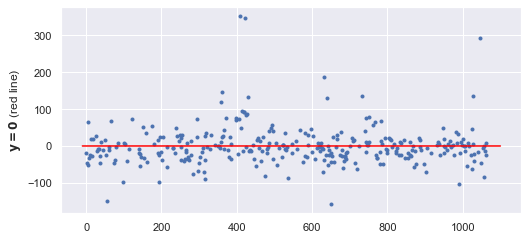

In [41]:
#error plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fzero = lambda x: x*0
x = np.linspace(-10, 1100, 10000)


plt.ylabel('$\mathbf{y=0}$ (red line)')
plt.plot((y_test-y_pred), marker='.', linestyle='') #close to zero
plt.plot(x, fzero(x), color='red')
plt.show()

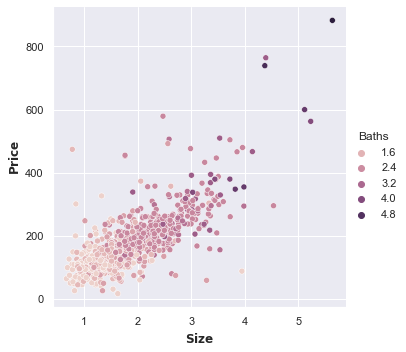

In [42]:
sns.set_theme(color_codes=True)
sns.relplot(data=data, x="Size", y="Price", hue="Baths")
plt.xlabel('$\mathbf{Size}$')
plt.ylabel('$\mathbf{Price}$')
plt.show()

In [43]:
model = sm.OLS(y_train, x_train)
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.925    
Dependent Variable:     Price            AIC:                         7999.5756
Date:                   2022-06-06 00:03 BIC:                         8027.2479
No. Observations:       744              Log-Likelihood:              -3993.8  
Df Model:               6                F-statistic:                 1523.    
Df Residuals:           738              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.925            Scale:                       2714.1   
-----------------------------------------------------------------------------------
                Coef.      Std.Err.        t        P>|t|       [0.025       0.975]
-----------------------------------------------------------------------------------
Size           77.0554       4.8095     16.0215     0.0000      67.6135     86.4973
Baths          23.3632       4.3011      5.4319     0.0000      14.9194     31.8069
Bedrooms       -5.2284       2.8235     -1.8517     0.0645     -10.7715      0.3147
Fireplace       3.4526       4.5197      0.7639     0.4452      -5.4203     12.3256
Acres          -0.4879       2.3625     -0.2065     0.8364      -5.1259      4.1500
Age            -0.0845       0.0634     -1.3324     0.1831      -0.2090      0.0400
-------------------------------------------------------------------------------
Omnibus:                 435.649           Durbin-Watson:              1.988   
Prob(Omnibus):           0.000             Jarque-Bera (JB):           6606.916
Skew:                    2.323             Prob(JB):                   0.000   
Kurtosis:                16.840            Condition No.:              125     
===============================================================================

"""

In [44]:
#for unnomilized data
pd.DataFrame(fitted_model.summary2().tables[1]['P>|t|']).applymap(lambda x: format(float(x),".4f")) #p-values

,P>|t|
Size,0.0000
Baths,0.0000
Bedrooms,0.0645
Fireplace,0.4452
Acres,0.8364
Age,0.1831


In [45]:
pd.DataFrame(fitted_model.summary2().tables[1].iloc[:,4:]).applymap(lambda x: format(float(x),".4f")) #confidence interval

,[0.025,0.975]
Size,67.6135,86.4973
Baths,14.9194,31.8069
Bedrooms,-10.7715,0.3147
Fireplace,-5.4203,12.3256
Acres,-5.1259,4.1500
Age,-0.2090,0.0400


##  Optimal model by using Backward Elimination

In [46]:
df_x.shape

(1063, 6)

In [47]:
df_x = np.append(arr = np.ones((df_x.shape[0], 1)).astype(int), 
              values = df_x, axis = 1)

x_opt = df_x[:, [0, 1, 2, 3, 4, 5, 6]]
ols = sm.OLS(endog = df_y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     288.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.66e-218
Time:                        00:03:22   Log-Likelihood:                -5708.0
No. Observations:                1063   AIC:                         1.143e+04
Df Residuals:                    1056   BIC:                         1.146e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9498      7.562      0.126      0.900     -13.889      15.789
x1            80.0729      4.170     19.204      0.000      71.891      88.255
x2            25.2787      3.870      6.532      0.000      17.685      32.873
x3            -9.0142      2.852     -3.160      0.002     -14.611      -3.417
x4             4.8438      3.776      1.283      0.200      -2.566      12.253
x5             1.8874      2.080      0.907      0.364      -2.194       5.968
x6            -0.0637      0.051     -1.244      0.214      -0.164       0.037
==============================================================================
Omnibus:                      580.365   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8151.571
Skew:                           2.191   Prob(JB):                         0.00
Kurtosis:                      15.839   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
p_value = ols.summary().tables[1]
#print(p_value.as_latex_tabular())

In [49]:
#remove the 5th col as it has the highest p_value
x_opt = df_x[:, [0, 1, 2, 3, 4, 6]]
ols = sm.OLS(endog = df_y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     346.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.28e-219
Time:                        00:03:22   Log-Likelihood:                -5708.5
No. Observations:                1063   AIC:                         1.143e+04
Df Residuals:                    1057   BIC:                         1.146e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1650      7.558      0.154      0.878     -13.666      15.996
x1            80.7267      4.107     19.658      0.000      72.669      88.785
x2            25.1755      3.868      6.508      0.000      17.585      32.766
x3            -9.0440      2.852     -3.171      0.002     -14.640      -3.448
x4             4.6969      3.772      1.245      0.213      -2.705      12.099
x5            -0.0618      0.051     -1.207      0.228      -0.162       0.039
==============================================================================
Omnibus:                      580.909   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8132.656
Skew:                           2.195   Prob(JB):                         0.00
Kurtosis:                      15.819   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
p_value = ols.summary().tables[1]
#print(p_value.as_latex_tabular())

In [51]:
#remove the 6th column as it has the highest p_value
x_opt = df_x[:, [0, 1, 2, 3, 4]]
ols = sm.OLS(endog = df_y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     432.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.19e-220
Time:                        00:03:22   Log-Likelihood:                -5709.2
No. Observations:                1063   AIC:                         1.143e+04
Df Residuals:                    1058   BIC:                         1.145e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7461      7.165     -0.244      0.808     -15.805      12.313
x1            80.5968      4.106     19.629      0.000      72.540      88.654
x2            26.7915      3.630      7.381      0.000      19.669      33.914
x3            -9.6727      2.805     -3.449      0.001     -15.176      -4.169
x4             5.1739      3.752      1.379      0.168      -2.189      12.537
==============================================================================
Omnibus:                      562.105   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7698.772
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.493   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
p_value = ols.summary().tables[1]
#print(p_value.as_latex_tabular())

In [53]:
# remove the 4th column as it has the highest p_value
x_opt = df_x[:, [0, 1, 2, 3]]
ols = sm.OLS(endog = df_y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     574.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.18e-221
Time:                        00:03:22   Log-Likelihood:                -5710.1
No. Observations:                1063   AIC:                         1.143e+04
Df Residuals:                    1059   BIC:                         1.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1682      7.161     -0.303      0.762     -16.220      11.884
x1            81.8376      4.008     20.419      0.000      73.973      89.702
x2            27.5882      3.585      7.695      0.000      20.553      34.623
x3            -9.7682      2.805     -3.482      0.001     -15.272      -4.264
==============================================================================
Omnibus:                      550.824   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7406.215
Skew:                           2.056   Prob(JB):                         0.00
Kurtosis:                      15.260   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#let's compute the residuals, and check the assumpitons of linear regression
res = y_pred - y_test 
res

,Price
175,-54.000558
984,-8.557810
685,40.593525
521,28.773121
855,33.167250
...,...
746,-2.613165
50,-16.771105
162,42.101613
866,11.309833


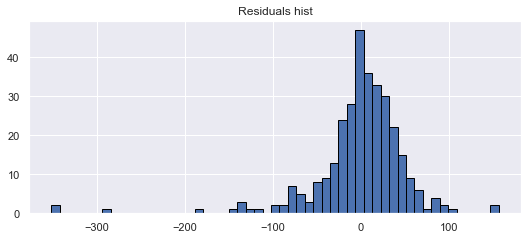

In [55]:
#Assumption: Normality Do the residuals seem to be normally distributed?
plt.hist(res,edgecolor='black',bins=53)
plt.title("Residuals hist")
plt.show()

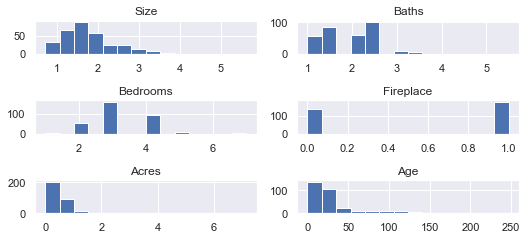

In [56]:
x_test.hist(bins=14)
plt.show()

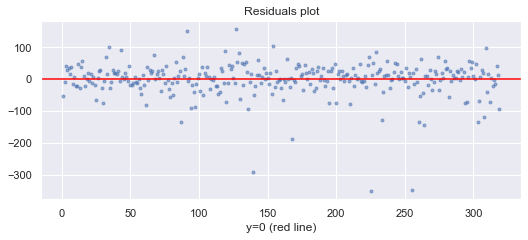

In [57]:
# Assumption: Linearity Do the residuals seem to have a structure?
# Assumption: Constant variance: do the residuals seem to be equally spaced out around zero?

plt.scatter(range(1, len(x_test)+1), res, marker='.',alpha=0.54)
plt.axhline(y=0, color='red', linestyle='-')
plt.title("Residuals plot")
plt.xlabel("y=0 (red line)")
plt.show()

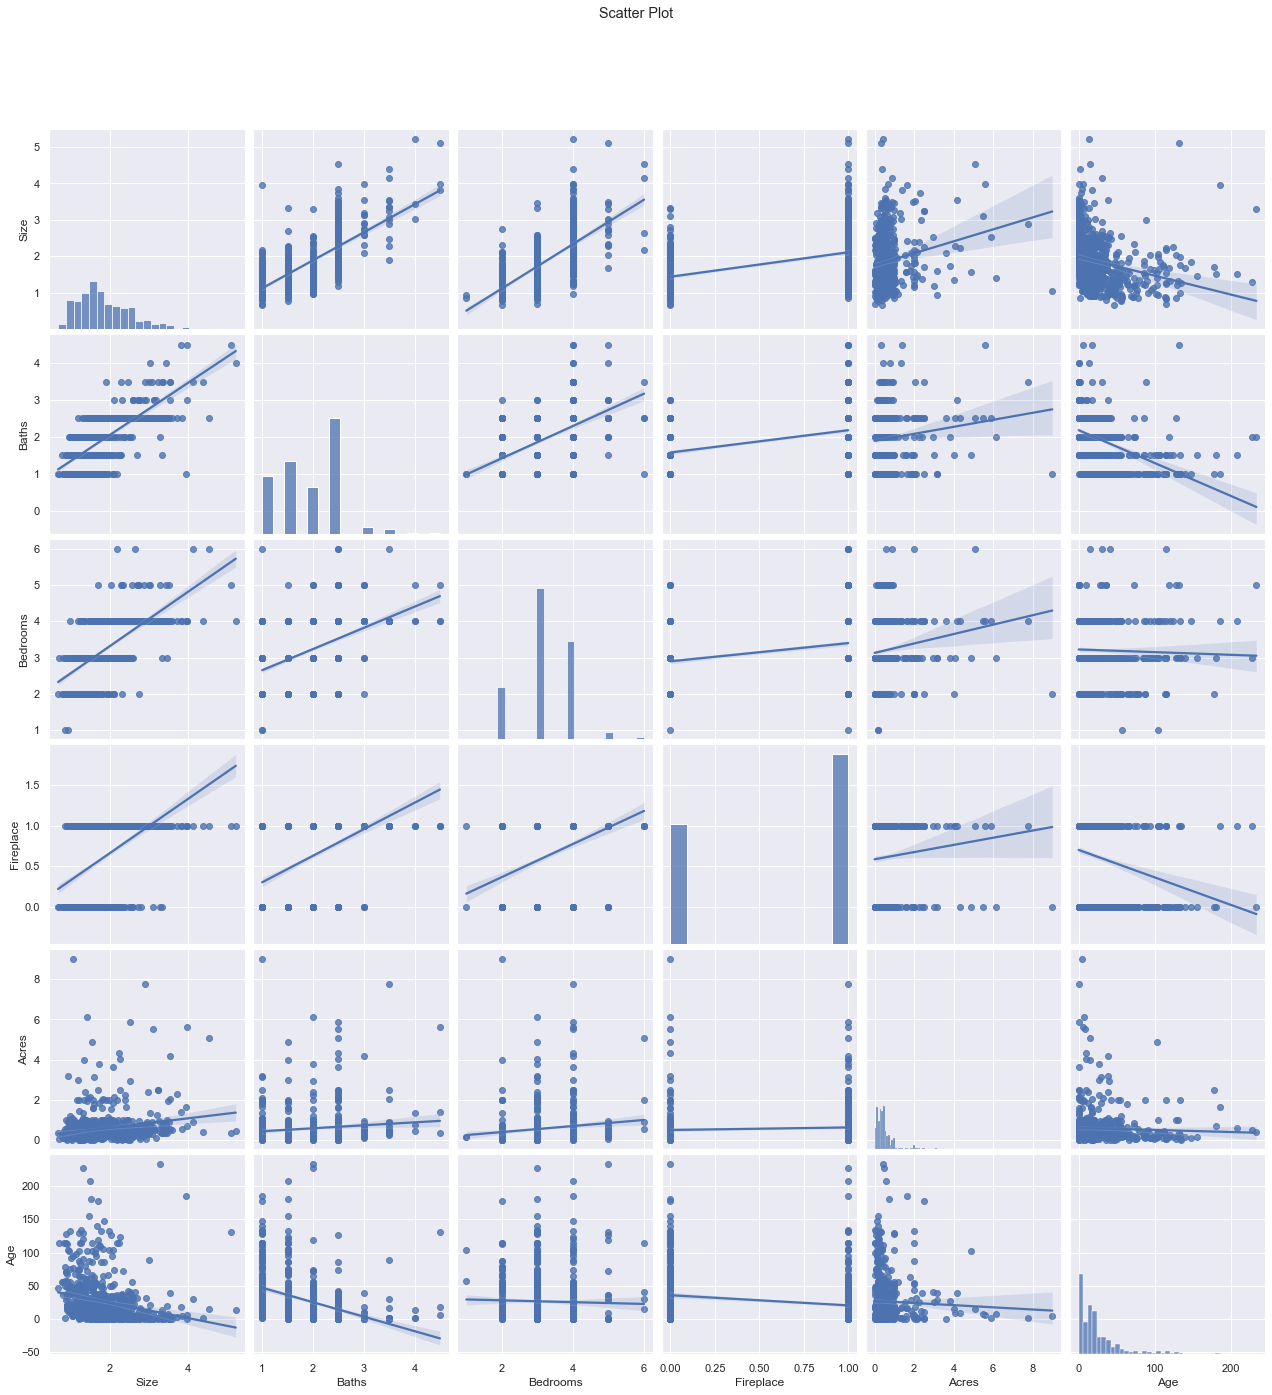

In [58]:
#Linearity/normality test
g = sns.pairplot(x_train, height=3, 
                diag_kind='hist', kind='reg')
g.fig.suptitle('Scatter Plot', y=1.08)
plt.show()

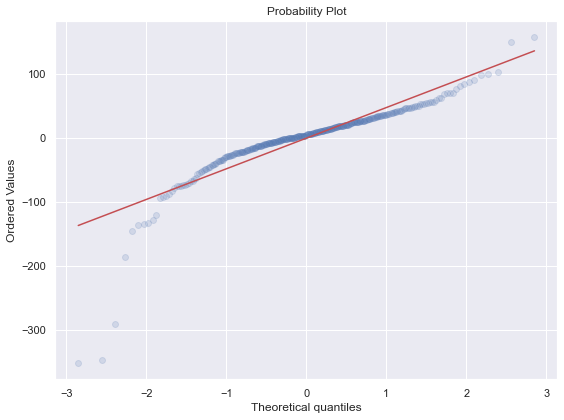

In [59]:
#Normality of errors/residue
import pylab
resi = np.array(list(map(lambda L: L[0],list(np.array(res)))))

fig, ax = plt.subplots(figsize=(8,6))
stats.probplot(resi, dist='norm', plot=plt, fit=True )
ax = pylab.gca()

line0 = ax.get_lines()[0]
line0.set_alpha(0.16)
plt.show()

In [60]:
#Durbin-Watson:
fitted_model.summary2().tables[2].iloc[:,2:]

,2,3
0,Durbin-Watson:,1.988
1,Jarque-Bera (JB):,6606.916
2,Prob(JB):,0.000
3,Condition No.:,125


In [61]:
x_train.corr()

,Size,Baths,Bedrooms,Fireplace,Acres,Age
Size,1.000000,0.735700,0.675593,0.472335,0.195409,-0.246189
Baths,0.735700,1.000000,0.506298,0.443716,0.118199,-0.441807
Bedrooms,0.675593,0.506298,1.000000,0.319887,0.139886,-0.031703
Fireplace,0.472335,0.443716,0.319887,1.000000,0.074605,-0.227628
Acres,0.195409,0.118199,0.139886,0.074605,1.000000,-0.041229
Age,-0.246189,-0.441807,-0.031703,-0.227628,-0.041229,1.000000


In [62]:
vif_fac = pd.DataFrame()
vif_fac["features"] = x_train.columns
vif_fac["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_fac.round(3)

,features,VIF Factor
0,Size,24.700
1,Baths,21.455
2,Bedrooms,23.722
3,Fireplace,3.432
4,Acres,1.561
5,Age,1.944


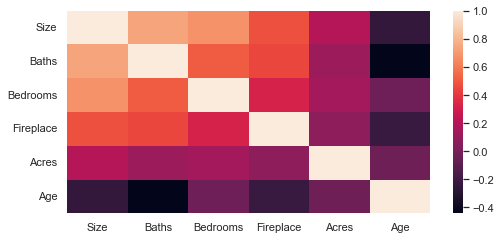

In [63]:
sns.heatmap(x_train.corr())
plt.show()

In [64]:
res = y_test - y_pred
#res

In [65]:
X_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          9.23e-142
Time:                        00:03:30   Log-Likelihood:                -3992.5
No. Observations:                 744   AIC:                             7999.
Df Residuals:                     737   BIC:                             8031.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9151      9.165      1.627      0.104      -3.078      32.908
Size          78.7065      4.910     16.030      0.000      69.067      88.346
Baths         20.3181      4.686      4.336      0.000      11.118      29.518
Bedrooms      -8.4829      3.457     -2.454      0.014     -15.271      -1.695
Fireplace      3.6171      4.516      0.801      0.423      -5.248      12.482
Acres         -0.6684      2.362     -0.283      0.777      -5.306       3.970
Age           -0.1210      0.067     -1.801      0.072      -0.253       0.011
==============================================================================
Omnibus:                      444.575   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6779.300
Skew:                           2.388   Prob(JB):                         0.00
Kurtosis:                      16.996   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lin_reg.resid

452     19.248965
568    -17.999933
310    -74.763123
434     80.879743
482    -24.588003
          ...    
1033   -23.718557
763    -24.219918
835    -24.154582
559    -41.435226
684    -34.431259
Length: 744, dtype: float64

In [67]:
print(format(lin_reg.resid.mean(),".14f"))
print(format(lin_reg.resid.std(),".14f"))

-0.00000000000097
51.82822672161125


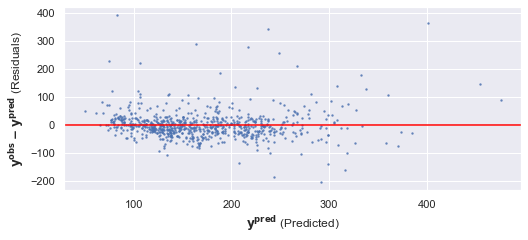

In [68]:
#The variance of the residuals is constant.

fitted_vals = lin_reg.predict()
resids = np.array(lin_reg.resid)



plt.ylabel("$\mathbf{y^{obs} - y^{pred}}$ (Residuals)")
plt.xlabel("$\mathbf{y^{pred}}$ (Predicted)")
plt.scatter(fitted_vals, resids, marker='.',s=9,alpha=0.67)
plt.axhline(y=0,color='red')
plt.show()

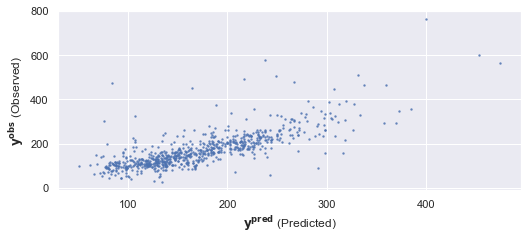

In [69]:
y_test_arr = np.array(list(map(lambda L: L[0], list(np.array(y_train)))))

plt.ylabel("$\mathbf{y^{obs}}$ (Observed)")
plt.xlabel("$\mathbf{y^{pred}}$ (Predicted)")
plt.scatter(fitted_vals, y_test_arr, marker='.',s=9,alpha=0.67)
plt.show()

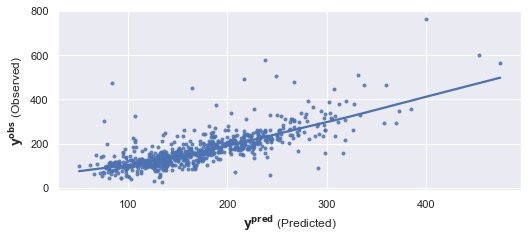

In [70]:
sns.regplot(x=fitted_vals, y=y_train, lowess=True,marker='.')
plt.ylabel("$\mathbf{y^{obs}}$ (Observed)")
plt.xlabel("$\mathbf{y^{pred}}$ (Predicted)")
plt.show()

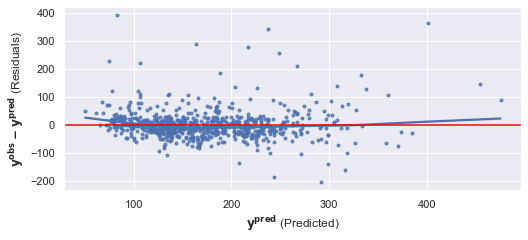

In [71]:
#The variance of the residuals is constant.
sns.regplot(x=fitted_vals, y=resids, lowess=True,marker='.')

plt.ylabel("$\mathbf{y^{obs} - y^{pred}}$ (Residuals)")
plt.xlabel("$\mathbf{y^{pred}}$ (Predicted)")
plt.axhline(y=0,color='red')
plt.show()

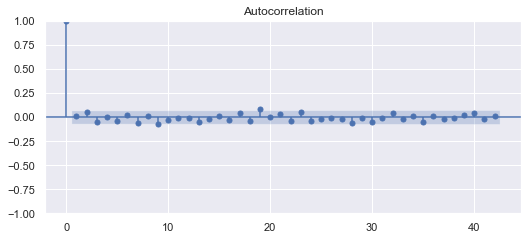

In [72]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=42 , alpha=0.06)
plt.show()